# Run Modes

Running MAGICC in different modes can be non-trivial. In this notebook we show how to set MAGICC's config flags so that it will run as desired for a few different cases.

In [1]:
# NBVAL_IGNORE_OUTPUT
from os.path import join
import datetime
import dateutil
from copy import deepcopy


import numpy as np
import pandas as pd

from pymagicc import MAGICC6, rcp26, zero_emissions
from pymagicc.io import MAGICCData

/Users/znicholls/Documents/AGCEC/MCastle/pymagicc-phackstock/venv/lib/python3.11/site-packages/scmdata/database/_database.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 6)

## Concentration to emissions hybrid

This is MAGICC's default run mode. In this run mode, MAGICC will run with prescribed concentrations (or a quantity which scales linearly with radiative forcing for aerosol species) until a given point in time and will then switch to running in emissions driven mode.

In [3]:
with MAGICC6() as magicc:
    res = magicc.run(rcp26)

In [4]:
# NBVAL_IGNORE_OUTPUT
res.head()

time                                                                                                                  1765-01-01  \
climate_model model scenario variable                           todo         unit    region                                        
MAGICC6       IMAGE RCP26    Radiative Forcing|Greenhouse Gases not_relevant W / m^2 World                                   0.0   
                                                                                     World|Northern Hemisphere|Ocean         0.0   
                                                                                     World|Northern Hemisphere|Land          0.0   
                                                                                     World|Southern Hemisphere|Ocean         0.0   
                                                                                     World|Southern Hemisphere|Land          0.0   

time                                                                                                                  1766-01-01  \
climate_model model scenario variable                           todo         unit    region                                        
MAGICC6       IMAGE RCP26    Radiative Forcing|Greenhouse Gases not_relevant W / m^2 World                              0.030727   
                                                                                     World|Northern Hemisphere|Ocean    0.031154   
                                                                                     World|Northern Hemisphere|Land     0.029018   
                                                                                     World|Southern Hemisphere|Ocean    0.032503   
                                                                                     World|Southern Hemisphere|Land     0.027911   

time                                                                                                                  1767-01-01  \
climate_model model scenario variable                           todo         unit    region                                        
MAGICC6       IMAGE RCP26    Radiative Forcing|Greenhouse Gases not_relevant W / m^2 World                              0.033519   
                                                                                     World|Northern Hemisphere|Ocean    0.033979   
                                                                                     World|Northern Hemisphere|Land     0.031691   
                                                                                     World|Southern Hemisphere|Ocean    0.035423   
                                                                                     World|Southern Hemisphere|Land     0.030492   

time                                                                                                                  1768-01-01  \
climate_model model scenario variable                           todo         unit    region                                        
MAGICC6       IMAGE RCP26    Radiative Forcing|Greenhouse Gases not_relevant W / m^2 World                              0.036425   
                                                                                     World|Northern Hemisphere|Ocean    0.036917   
                                                                                     World|Northern Hemisphere|Land     0.034476   
                                                                                     World|Southern Hemisphere|Ocean    0.038457   
                                                                                     World|Southern Hemisphere|Land     0.033183   

time                                                                                                                  1769-01-01  \
climate_model model scenario variable                           todo         unit    region                                        
MAGICC6       IMAGE RCP26    Radiati

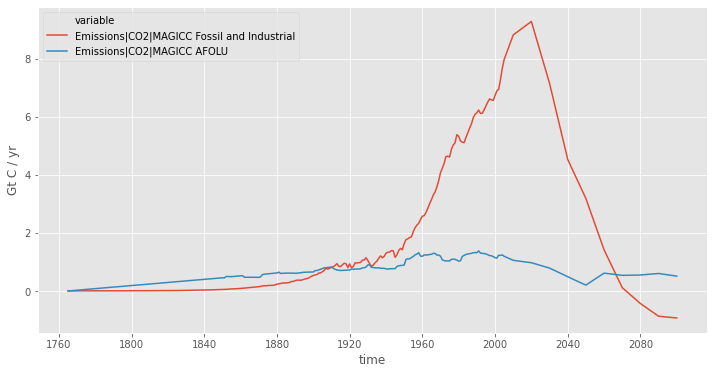

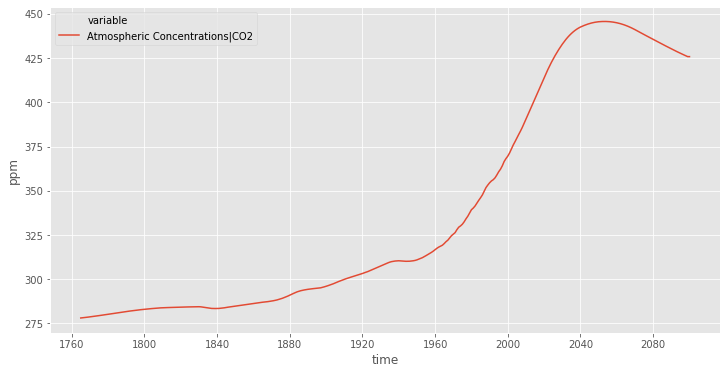

In [5]:
plt.figure()
res.filter(variable="Emis*CO2*", region="World").line_plot(hue="variable")
plt.figure()
res.filter(variable="Atmos*Conc*CO2", region="World").line_plot(hue="variable");

The switches which control the time at which MAGICC switches from concentrations driven to emissions driven are all in the form `GAS_SWITCHFROMXXX2EMIS_YEAR` e.g. `CO2_SWITCHFROMCONC2EMIS_YEAR` and `BCOC_SWITCHFROMRF2EMIS_YEAR`. 

Changing the value of these switches will alter how MAGICC runs.

In [6]:
# NBVAL_IGNORE_OUTPUT
df = deepcopy(rcp26)
df["scenario"] = "RCP26_altered_co2_switch"
with MAGICC6() as magicc:
    res = res.append(magicc.run(df, co2_switchfromconc2emis_year=1850))

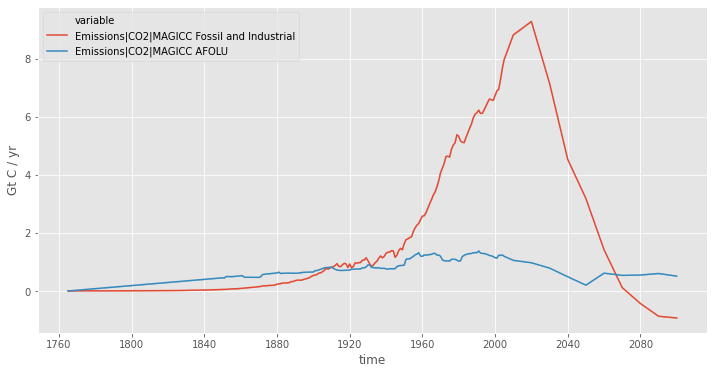

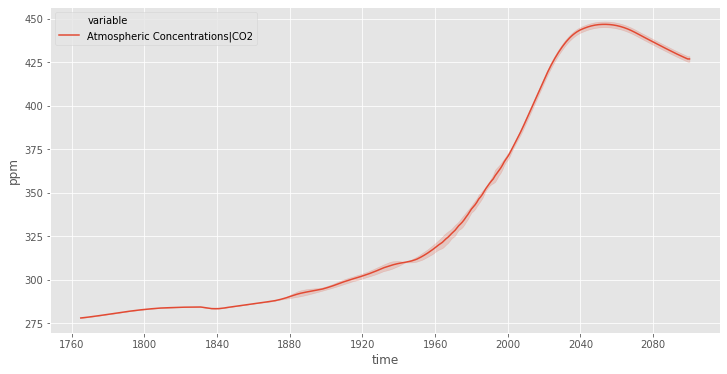

In [7]:
plt.figure()
res.filter(variable="Emis*CO2*", region="World").line_plot(hue="variable")
plt.figure()
res.filter(variable="Atmos*Conc*CO2", region="World").line_plot(hue="variable");

In [8]:
# NBVAL_IGNORE_OUTPUT
res.timeseries()

time                                                                                                                                    1765-01-01  \
climate_model model scenario                 variable                           todo         unit      region                                        
MAGICC6       IMAGE RCP26                    Radiative Forcing|Greenhouse Gases not_relevant W / m^2   World                                   0.0   
                                                                                                       World|Northern Hemisphere|Ocean         0.0   
                                                                                                       World|Northern Hemisphere|Land          0.0   
                                                                                                       World|Southern Hemisphere|Ocean         0.0   
                                                                                                       World|Southern Hemisphere|Land          0.0   
...                                                                                                                                            ...   
                    RCP26_altered_co2_switch Emissions|CO2|MAGICC AFOLU         not_relevant Gt C / yr World                                   0.0   
                                                                                                       World|Northern Hemisphere|Ocean         0.0   
                                                                                                       World|Northern Hemisphere|Land          0.0   
                                                                                                       World|Southern Hemisphere|Ocean         0.0   
                                                                                                       World|Southern Hemisphere|Land          0.0   

time                                                                                                                                    1766-01-01  \
climate_model model scenario                 variable                           todo         unit      region                                        
MAGICC6       IMAGE RCP26                    Radiative Forcing|Greenhouse Gases not_relevant W / m^2   World                              0.030727   
                                                                                                       World|Northern Hemisphere|Ocean    0.031154   
                                                                                                       World|Northern Hemisphere|Land     0.029018   
                                                                                                       World|Southern Hemisphere|Ocean    0.032503   
                                                                                                       World|Southern Hemisphere|Land     0.027911   
...                                                                                                                                            ...   
                    RCP26_altered_co2_switch Emissions|CO2|MAGICC AFOLU         not_relevant Gt C / yr World                              0.005338   
                                                                                                       World|Northern Hemisphere|Ocean    0.000000   
                                                                                                       World|Northern Hemisphere|Land     0.004731   
                                                                                                       World|Southern Hemisphere|Ocean    0.000000   
                                                                                                       World|Southern Hemisphere|Land     0.000607   

time                                                                                              

As we can see, the emissions remain unchanged but the concentrations are altered as MAGICC is now running emissions driven from 1850 rather than 2005 (the default).

To get a fully emissions driven run, you need to change all of the relevant `GAS_SWITCHXXX2EMIS_YEAR` flags.

## CO$_2$ Emissions Driven Only

We can get a CO$_2$ emissions only driven run like shown.

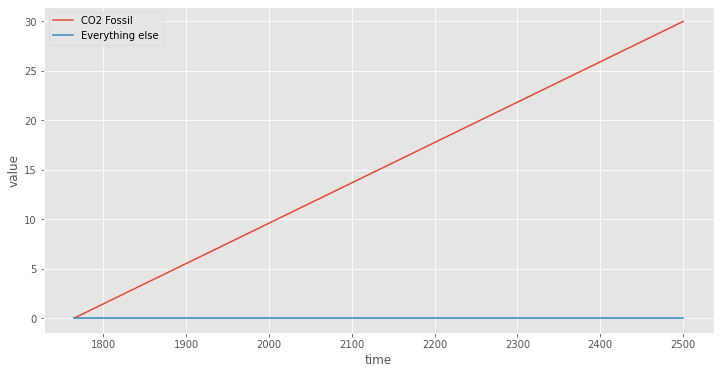

In [9]:
df = zero_emissions.timeseries()

time = zero_emissions["time"]
df.loc[
    (
        df.index.get_level_values("variable")
        == "Emissions|CO2|MAGICC Fossil and Industrial"
    ),
    :,
] = np.linspace(0, 30, len(time))

scen = MAGICCData(df)
scen.filter(variable="Em*CO2*Fossil*").line_plot(
    x="time", label="CO2 Fossil", hue=None
)
scen.filter(variable="Em*CO2*Fossil*", keep=False).line_plot(
    x="time", label="Everything else", hue=None
);

In [10]:
# NBVAL_IGNORE_OUTPUT
with MAGICC6() as magicc:
    co2_only_res = magicc.run(
        scen,
        endyear=scen["time"].max().year,
        rf_total_constantafteryr=5000,
        rf_total_runmodus="CO2",
        co2_switchfromconc2emis_year=min(scen["time"]).year,
    )

/home/jared/code/uom/pymagicc/pymagicc/io/scen.py:254: UserWarning: Ignoring input data which is not required for .SCEN file
  warnings.warn("Ignoring input data which is not required for .SCEN file")


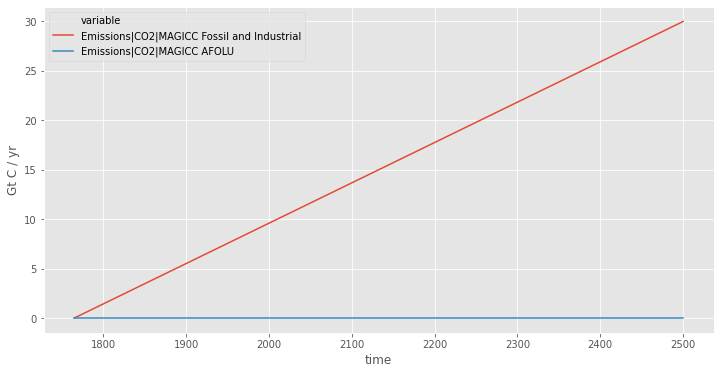

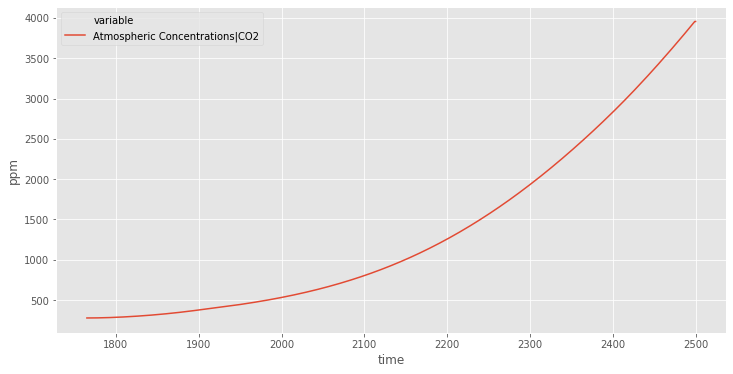

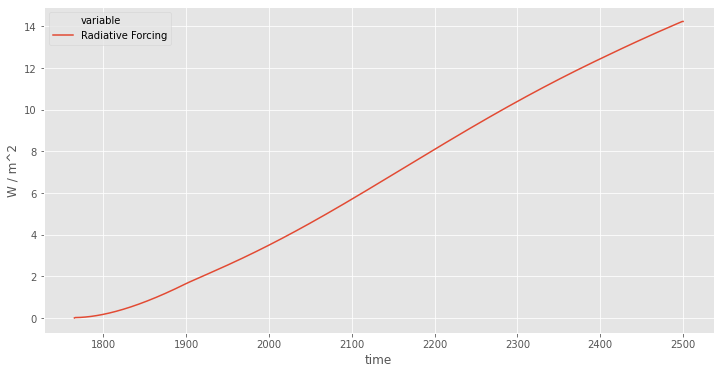

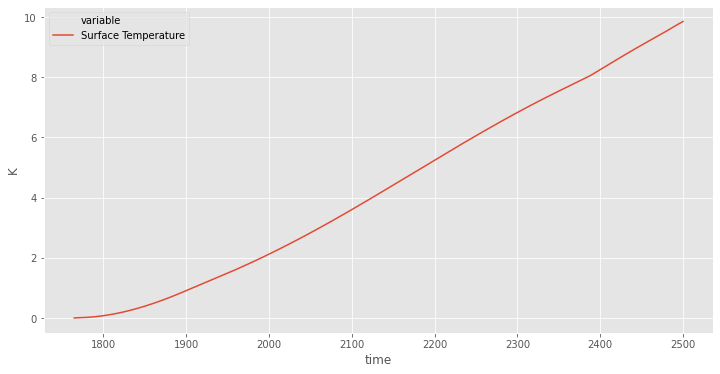

In [11]:
for v in [
    "Emis*CO2*",
    "Atmos*Conc*CO2",
    "Radiative Forcing",
    "Surface Temperature",
]:
    plt.figure()
    co2_only_res.filter(variable=v, region="World").line_plot(hue="variable")

## Prescribed Forcing Driven Only

It is also possible to examine MAGICC's response to a prescribed radiative forcing only.

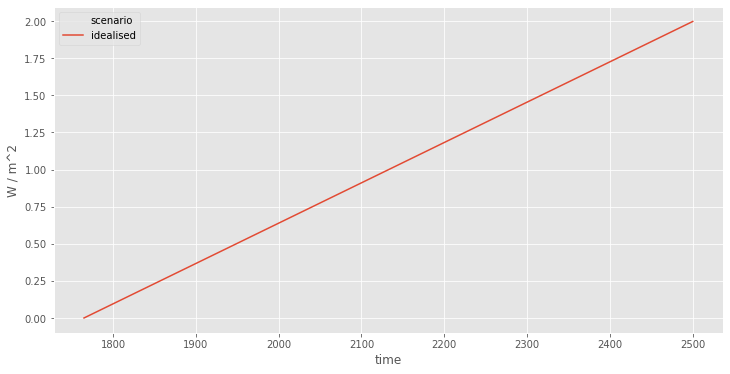

In [12]:
time = zero_emissions["time"]

forcing_external = 2.0 * np.arange(0, len(time)) / len(time)
forcing_ext = MAGICCData(
    forcing_external,
    index=time,
    columns={
        "scenario": ["idealised"],
        "model": ["unspecified"],
        "climate_model": ["unspecified"],
        "variable": ["Radiative Forcing|Extra"],
        "unit": ["W / m^2"],
        "todo": ["SET"],
        "region": ["World"],
    },
)
forcing_ext.metadata = {
    "header": "External radiative forcing with linear increase"
}
forcing_ext.line_plot(x="time");

In [13]:
with MAGICC6() as magicc:
    forcing_ext_filename = "CUSTOM_EXTRA_RF.IN"
    forcing_ext.write(
        join(magicc.run_dir, forcing_ext_filename), magicc.version
    )
    ext_forc_only_res = magicc.run(
        rf_extra_read=1,
        file_extra_rf=forcing_ext_filename,
        rf_total_runmodus="QEXTRA",
        endyear=max(time).year,
        rf_initialization_method="ZEROSTARTSHIFT",  # this is default but to be sure
        rf_total_constantafteryr=5000,
    )

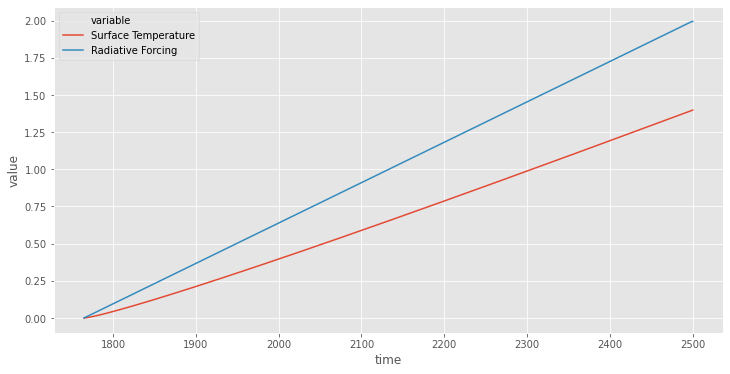

In [14]:
ext_forc_only_res.filter(
    variable=["Radiative Forcing", "Surface Temperature"], region="World"
).line_plot(hue="variable")

## Zero Temperature Output

Getting MAGICC to return zero for its temperature output is surprisingly difficult. To help address this, we add the `set_zero_config` method to our MAGICC classes.

In [15]:
print(MAGICC6.set_zero_config.__doc__)

Set config such that radiative forcing and temperature output will be zero

        This method is intended as a convenience only, it does not handle everything in
        an obvious way. Adjusting the parameter settings still requires great care and
        may behave unepexctedly.
        


In [16]:
# NBVAL_IGNORE_OUTPUT
with MAGICC6() as magicc:
    magicc.set_zero_config()
    res_zero = magicc.run()

/home/jared/code/uom/pymagicc/pymagicc/io/scen.py:254: UserWarning: Ignoring input data which is not required for .SCEN file
  warnings.warn("Ignoring input data which is not required for .SCEN file")


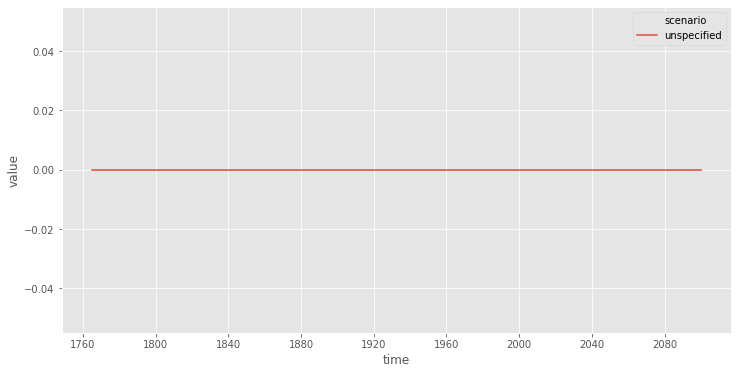

In [17]:
res_zero.filter(
    variable=["Surface Temperature", "Radiative Forcing"], region="World"
).line_plot(x="time");

## CO$_2$ Emissions and Prescribed Forcing

It is also possible to run MAGICC in a mode which is CO$_2$ emissions driven but also includes a prescribed external forcing.

/Users/znicholls/Documents/AGCEC/MCastle/pymagicc-phackstock/venv/lib/python3.11/site-packages/scmdata/plotting.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)
/Users/znicholls/Documents/AGCEC/MCastle/pymagicc-phackstock/venv/lib/python3.11/site-packages/scmdata/plotting.py:81: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


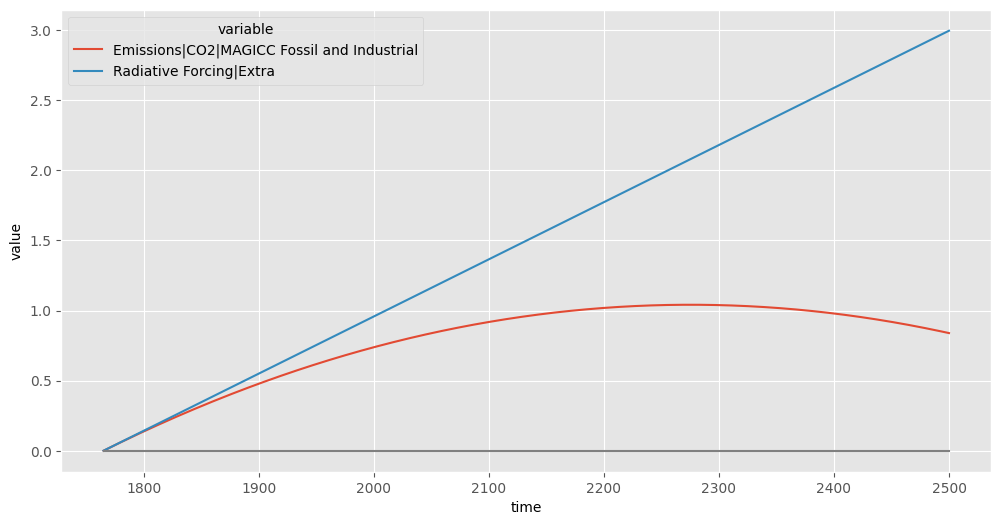

In [3]:
df = zero_emissions.timeseries()

time = zero_emissions["time"]
emms_fossil_co2 = (
    np.linspace(0, 3, len(time))
    - (1 + (np.arange(len(time)) - 500) / 500) ** 2
)
df.loc[
    (
        df.index.get_level_values("variable")
        == "Emissions|CO2|MAGICC Fossil and Industrial"
    ),
    :,
] = emms_fossil_co2

scen = MAGICCData(df)

forcing_external = 3.0 * np.arange(0, len(time)) / len(time)
forcing_ext = MAGICCData(
    forcing_external,
    index=time,
    columns={
        "scenario": ["idealised"],
        "model": ["unspecified"],
        "climate_model": ["unspecified"],
        "variable": ["Radiative Forcing|Extra"],
        "unit": ["W / m^2"],
        "todo": ["SET"],
        "region": ["World"],
    },
)
forcing_ext.metadata = {
    "header": "External radiative forcing with linear increase"
}
scen.filter(variable="Em*CO2*Fossil*").append(forcing_ext).line_plot(x="time", hue="variable")
scen.filter(variable="Em*CO2*Fossil*", keep=False).line_plot(
    x="time", hue="scenario", palette="gray", legend=False
);

In [19]:
# NBVAL_IGNORE_OUTPUT
scen.timeseries()

time                                                                                                         1765-01-01 00:00:00  \
model       scenario  region variable                                   unit             climate_model todo                        
unspecified idealised World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr        unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr        unspecified   SET                   0.0   
                             Emissions|CH4                              Mt CH4 / yr      unspecified   SET                   0.0   
                             Emissions|N2O                              Mt N2ON / yr     unspecified   SET                   0.0   
                             Emissions|SOx                              Mt S / yr        unspecified   SET                   0.0   
                             Emissions|CO                               Mt CO / yr       unspecified   SET                   0.0   
                             Emissions|NMVOC                            Mt NMVOC / yr    unspecified   SET                   0.0   
                             Emissions|NOx                              Mt N / yr        unspecified   SET                   0.0   
                             Emissions|BC                               Mt BC / yr       unspecified   SET                   0.0   
                             Emissions|OC                               Mt OC / yr       unspecified   SET                   0.0   
                             Emissions|NH3                              Mt N / yr        unspecified   SET                   0.0   
                             Emissions|CF4                              kt CF4 / yr      unspecified   SET                   0.0   
                             Emissions|C2F6                             kt C2F6 / yr     unspecified   SET                   0.0   
                             Emissions|C6F14                            kt C6F14 / yr    unspecified   SET                   0.0   
                             Emissions|HFC23                            kt HFC23 / yr    unspecified   SET                   0.0   
                             Emissions|HFC32                            kt HFC32 / yr    unspecified   SET                   0.0   
                             Emissions|HFC4310                          kt HFC4310 / yr  unspecified   SET                   0.0   
                             Emissions|HFC125                           kt HFC125 / yr   unspecified   SET                   0.0   
                             Emissions|HFC134a                          kt HFC134a / yr  unspecified   SET                   0.0   
                             Emissions|HFC143a                          kt HFC143a / yr  unspecified   SET                   0.0   
                             Emissions|HFC227ea                         kt HFC227ea / yr unspecified   SET                   0.0   
                             Emissions|HFC245fa                         kt HFC245fa / yr unspecified   SET                   0.0   
                             Emissions|SF6                              kt SF6 / yr      unspecified   SET                   0.0   

time                                                                                                         1766-01-01 00:00:00  \
model       scenario  region variable                                   unit             climate_model todo                        
unspecified idealised World  Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr        unspecified   SET              0.004078   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr        unspecified   SET              0.000000   
                             Emissions|CH4                              Mt CH4 / yr      unspecified   SET              0.000000   
                             Emissions|

In [20]:
with MAGICC6() as magicc:
    magicc.set_zero_config()  # very important, try commenting this out and see what happens
    forcing_ext_filename = "CUSTOM_EXTRA_RF.IN"
    forcing_ext.write(
        join(magicc.run_dir, forcing_ext_filename), magicc.version
    )
    co2_emms_ext_forc_res = magicc.run(
        scen,
        endyear=scen["time"].max().year,
        co2_switchfromconc2emis_year=min(scen["time"]).year,
        rf_extra_read=1,
        file_extra_rf=forcing_ext_filename,
        rf_total_runmodus="ALL",  # default but just in case
        rf_initialization_method="ZEROSTARTSHIFT",  # this is default but to be sure
        rf_total_constantafteryr=5000,
    )

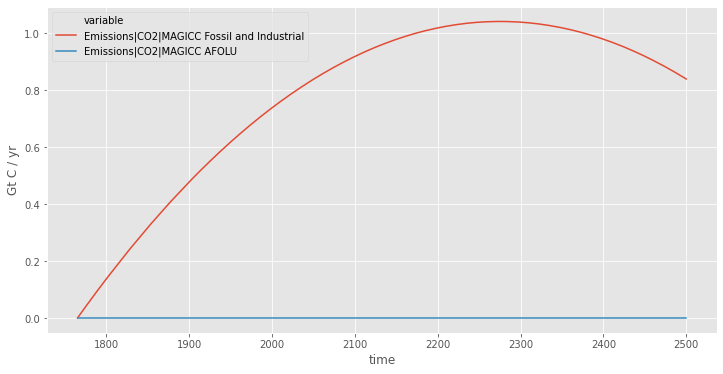

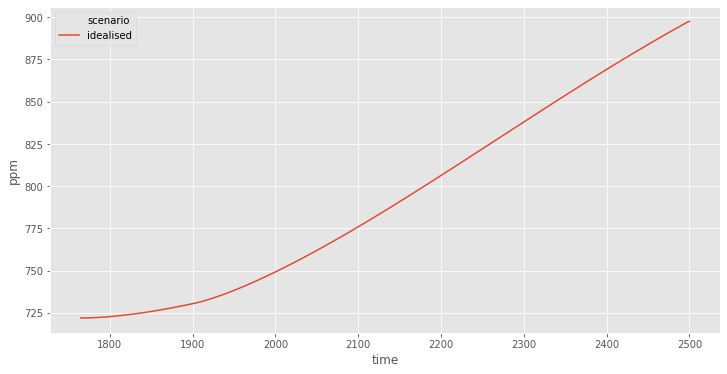

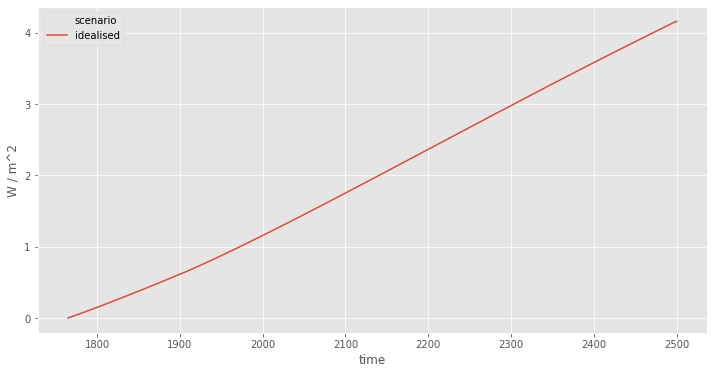

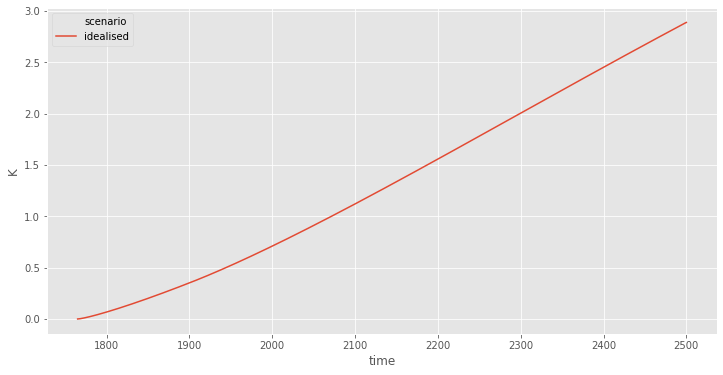

In [21]:
plt.figure()
co2_emms_ext_forc_res.filter(variable="Emis*CO2*", region="World").line_plot(
    x="time", hue="variable"
)
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Atmos*Conc*CO2", region="World"
).line_plot(x="time")
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Radiative Forcing", region="World"
).line_plot(x="time")
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Surface Temperature", region="World"
).line_plot(x="time");

If we adjust MAGICC's CO$_2$ temperature feedback start year, it is easier to see what is going on.

In [22]:
with MAGICC6() as magicc:
    magicc.set_zero_config()

    forcing_ext_filename = "CUSTOM_EXTRA_RF.IN"
    forcing_ext.write(
        join(magicc.run_dir, forcing_ext_filename), magicc.version
    )
    for temp_feedback_year in [2000, 2100, 3000]:
        scen["scenario"] = "idealised_{}_CO2_temperature_feedback".format(
            temp_feedback_year
        )

        co2_emms_ext_forc_res.append(
            magicc.run(
                scen,
                endyear=scen["time"].max().year,
                co2_switchfromconc2emis_year=min(scen["time"]).year,
                rf_extra_read=1,
                file_extra_rf=forcing_ext_filename,
                rf_total_runmodus="ALL",
                rf_initialization_method="ZEROSTARTSHIFT",
                rf_total_constantafteryr=5000,
                co2_tempfeedback_yrstart=temp_feedback_year,
            )
        )

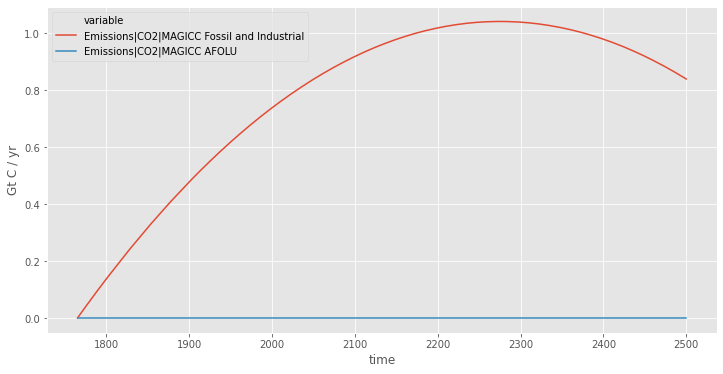

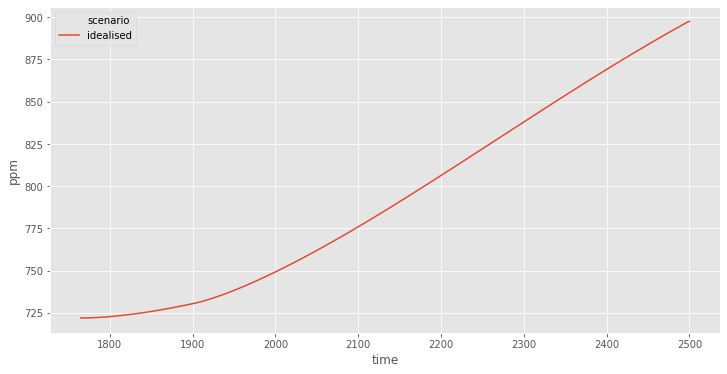

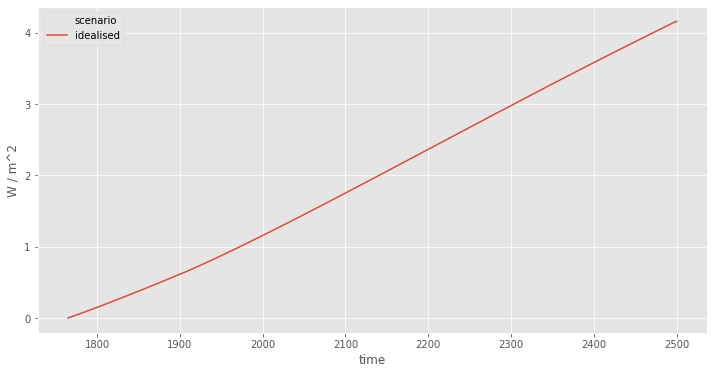

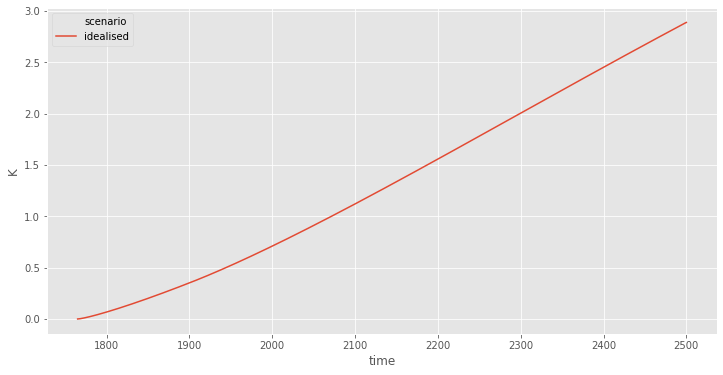

In [23]:
co2_emms_ext_forc_res.filter(variable="Emis*CO2*", region="World").line_plot(
    x="time", hue="variable"
)
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Atmos*Conc*CO2", region="World"
).line_plot(x="time")
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Radiative Forcing", region="World"
).line_plot(x="time")
plt.figure()
co2_emms_ext_forc_res.filter(
    variable="Surface Temperature", region="World"
).line_plot(x="time");

## CO$_2$ Concentrations Driven

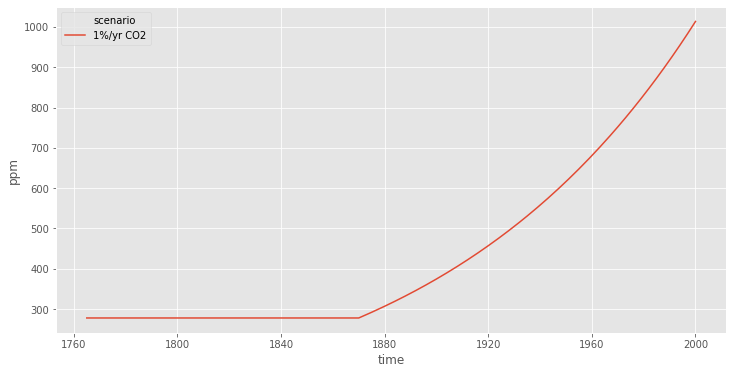

In [24]:
time = zero_emissions["time"]

co2_concs = 278 * np.ones_like(time)
co2_concs[105:] = 278 * 1.01 ** (np.arange(0, len(time[105:])))

co2_concs = MAGICCData(
    co2_concs,
    index=time,
    columns={
        "scenario": ["1%/yr CO2"],
        "model": ["unspecified"],
        "climate_model": ["unspecified"],
        "variable": ["Atmospheric Concentrations|CO2"],
        "unit": ["ppm"],
        "todo": ["SET"],
        "region": ["World"],
    },
)
co2_concs = co2_concs.filter(year=range(1700, 2001))
time = co2_concs["time"]
co2_concs.metadata = {"header": "1%/yr atmospheric CO2 concentration increase"}
co2_concs.line_plot(x="time");

In [25]:
with MAGICC6() as magicc:
    co2_conc_filename = "1PCT_CO2_CONC.IN"
    co2_concs.write(join(magicc.run_dir, co2_conc_filename), magicc.version)
    co2_conc_driven_res = magicc.run(
        file_co2_conc=co2_conc_filename,
        co2_switchfromconc2emis_year=max(time).year,
        co2_tempfeedback_switch=1,
        co2_tempfeedback_yrstart=1870,
        co2_fertilization_yrstart=1870,
        rf_total_runmodus="CO2",
        rf_total_constantafteryr=max(time).year,
        endyear=max(time).year,
        out_inverseemis=1,
    )

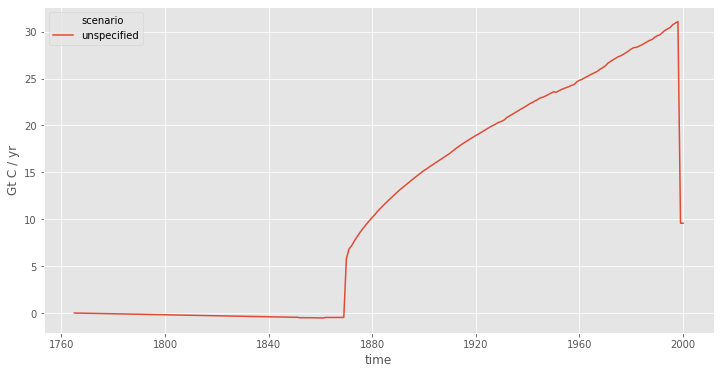

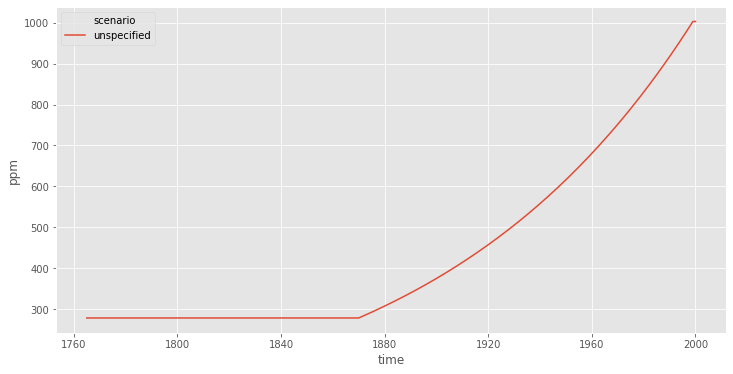

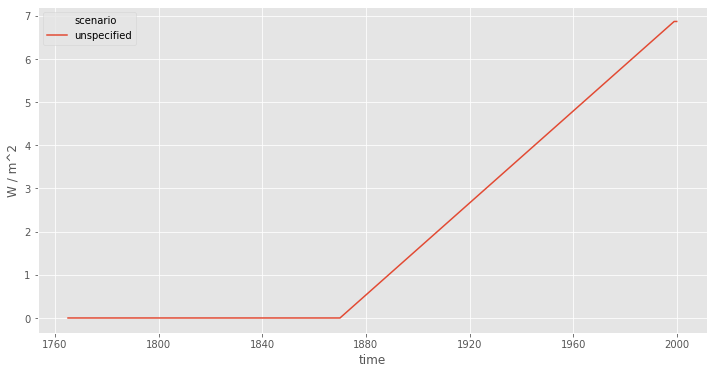

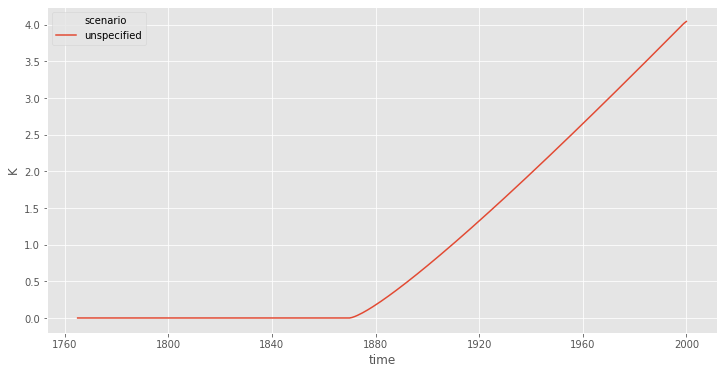

In [26]:
plt.figure()
co2_conc_driven_res.filter(
    variable="Inverse Emis*CO2*", region="World"
).line_plot()
plt.figure()
co2_conc_driven_res.filter(
    variable="Atmos*Conc*CO2", region="World"
).line_plot()
plt.figure()
co2_conc_driven_res.filter(
    variable="Radiative Forcing", region="World"
).line_plot()
plt.figure()
co2_conc_driven_res.filter(
    variable="Surface Temperature", region="World"
).line_plot();